In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read file, drop unnecessary columns, drop refund row

df = pd.read_csv('./ciawi_itemdet.csv')
df.drop(columns=['Outlet', 'Variant', 'Modifier Applied', 'Gross Sales', 'Refunds', 'Gratuity', 'Tax', 'Sales Type', 'Collected By', 'Served By', 'Customer', 'Event Type'], inplace=True)
df = df[~df.Items.str.contains("Refund", na=False)]
df

,Receipt Number,Date,Time,Category,Items,Discounts,Net Sales,Payment Method
0,3BO74O,30-05-2021,19:24:12,NON COFFEE,GREENTEA,0.0,18000.0,Cash
1,3BO74O,30-05-2021,19:24:12,AFDHOL SIGNATURE,CIKAWANI,0.0,15000.0,Cash
2,3BO74N,30-05-2021,19:22:03,SNACK,KENTANG SOSIS,0.0,17000.0,Cash
3,3BO74N,30-05-2021,19:22:03,ESPRESSO BASED,CAFE LATTE,0.0,18000.0,Cash
4,3BO74N,30-05-2021,19:22:03,NON COFFEE,GREENTEA,0.0,18000.0,Cash
...,...,...,...,...,...,...,...,...
6393,3BO5VY,01-05-2021,17:29:50,MAKANAN BERAT,CHICKEN KARAGE,0.0,18000.0,Cash
6394,3BO5VY,01-05-2021,17:29:50,MAKANAN BERAT,CHICKEN KARAGE,0.0,18000.0,Cash
6395,3BO5VY,01-05-2021,17:29:50,MAKANAN BERAT,CHICKEN KARAGE,0.0,18000.0,Cash
6396,3BO5VY,01-05-2021,17:29:50,MAKANAN BERAT,CHICKEN KARAGE,0.0,18000.0,Cash


In [5]:
# convert date to day
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Hari'] = df['Date'].dt.dayofweek
df['Hari'] = df['Date'].dt.day_name()

df.drop(columns=['Date'], inplace=True)

In [6]:
# convert time to hour

df['Time'] = pd.to_timedelta(df['Time'])
df['Jam'] = df['Time'].dt.components['hours']

df.drop(columns=['Time'], inplace=True)

In [8]:
for col in ['Category', 'Items', 'Hari']:
    df[col] = df[col].astype('category')

In [7]:
# number of sales based on category

df.Category.value_counts()

NON COFFEE          1664
BUKBER              1300
ESPRESSO BASED       807
MAKANAN BERAT        796
AFDHOL SIGNATURE     676
SNACK                522
MANUAL BREW          282
DESSERT              225
MOJITO               103
Uncategorized          9
Name: Category, dtype: int64

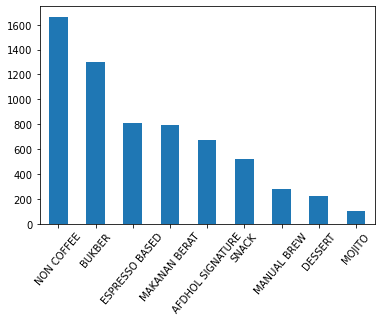

In [30]:
# sales based on category

df.Category.value_counts()[:9].plot(kind='bar', rot=50)

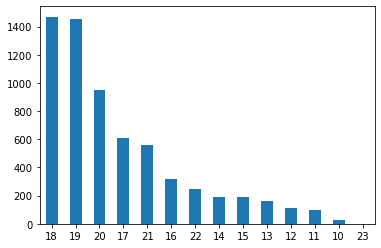

In [10]:
# finding rush hour 

df.Jam.value_counts().plot(kind='bar', rot=0)

In [11]:
# daily sales based on category

df.groupby(['Hari', 'Category']).size().unstack(fill_value=0)

Category,AFDHOL SIGNATURE,BUKBER,DESSERT,ESPRESSO BASED,MAKANAN BERAT,MANUAL BREW,MOJITO,NON COFFEE,SNACK,Uncategorized
Hari,,,,,,,,,,
Friday,76,100,29,63,84,17,8,212,49,1
Monday,93,239,35,115,114,39,22,229,77,2
Saturday,129,246,49,173,180,61,23,379,116,2
Sunday,117,196,32,156,134,57,18,260,83,2
Thursday,78,108,15,57,87,36,13,149,43,0
Tuesday,98,207,32,124,96,48,11,229,89,1
Wednesday,85,204,33,119,101,24,8,206,65,1


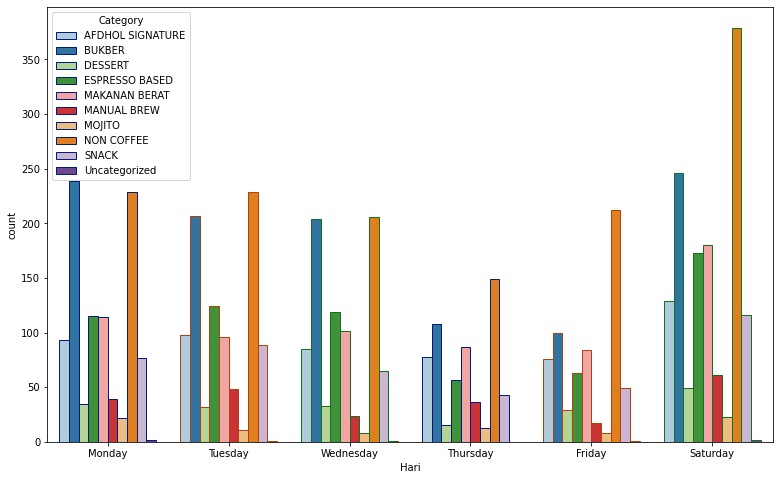

In [12]:
# daily sales based on category plot

fig, ax = plt.subplots(figsize=(13,8))
sns.countplot(x ='Hari',
              hue='Category', 
              palette='Paired',
              edgecolor=sns.color_palette("dark", 3),
              data = df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Show the plot
plt.show()

In [13]:
df.Items.value_counts()[:10]

AYAM BAKAR KECAP AFDHOL + Cleo        444
AFDHOL COFFEE                         436
AYAM PENYET AFDHOL + ORANGE SQUASH    298
GREENTEA                              231
AYAM GORENG AFDHOL + LYCHEE YAKULT    219
MINERAL WATER                         218
RED VELVET                            209
KLEPON                                161
LEMONADE                              156
AYAM GORENG AFDHOL + Cleo             155
Name: Items, dtype: int64

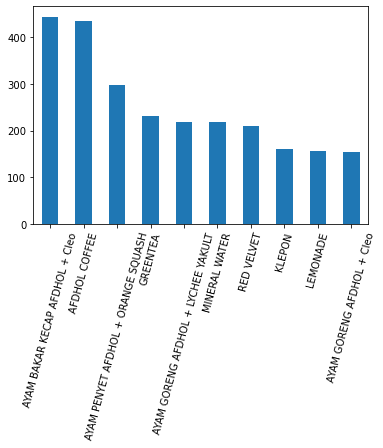

In [31]:
# finding best seller items

df.Items.value_counts()[:10].plot(kind='bar', rot=75)

In [32]:
# least ordered items

df.Items.value_counts()[60:73]

ESPRESSO                 24
ROTI BAKAR               23
MELT BITE                23
ES KOPI BANANA           20
CREAMY FLOAT COFFEE      20
AFOGATO                  17
CHEESE OMLET MOZZA       14
SANDWICH CARBONARA SC    14
CHICKEN CORDON BLEU      14
TORTILLA                 12
CHUANKY                  12
TUBRUK                   11
EUFONI COFFEE             9
Name: Items, dtype: int64

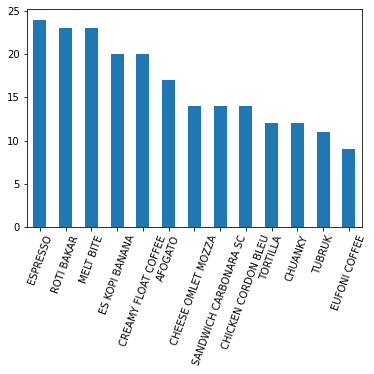

In [33]:
# plot for least ordered items

df.Items.value_counts()[60:73].plot(kind='bar', rot=70)

In [25]:
# items daily sales

#pd.set_option('display.max_colwidth', 80)
df.groupby(['Hari', 'Items']).size().unstack(fill_value=0)

Items,AFDHOL COFFEE,AFOGATO,AMERICANO,AYAM BAKAR KECAP AFDHOL + Cleo,AYAM BAKAR KECAP AFDHOL + KLEPON,AYAM BETUTU KHAS BALI,AYAM GORENG,AYAM GORENG AFDHOL + Cleo,AYAM GORENG AFDHOL + LYCHEE YAKULT,AYAM PENYET AFDHOL + LEMON SQUASH,...,STRABERRY MOJITO,STRAWBERRY SQUASH,TARO,TORTILLA,TUBRUK,V60,VANILA CAFE LATE,VIETNAM DRIP,VIRJIN MOJITO,WAFFLE
Hari,,,,,,,,,,,,,,,,,,,,,
Friday,52,2,6,58,0,8,0,6,0,0,...,2,2,13,2,0,6,12,6,2,4
Monday,49,1,14,72,36,11,0,15,36,38,...,6,7,18,0,2,18,13,15,7,9
Saturday,78,4,14,72,28,19,2,17,51,37,...,5,12,25,2,4,30,24,21,7,16
Sunday,72,5,14,17,8,26,2,50,30,37,...,7,14,23,1,1,24,13,27,4,13
Thursday,55,0,2,27,0,6,0,0,57,0,...,3,3,9,1,1,20,5,9,3,4
Tuesday,72,2,12,109,0,4,2,27,11,0,...,1,8,13,2,2,19,22,19,1,17
Wednesday,58,3,9,89,0,14,1,40,34,0,...,2,5,19,4,1,9,7,9,4,10


In [26]:
# items number of sales for each category

df.groupby(['Category', 'Items']).size().unstack(fill_value=0)

Items,AFDHOL COFFEE,AFOGATO,AMERICANO,AYAM BAKAR KECAP AFDHOL + Cleo,AYAM BAKAR KECAP AFDHOL + KLEPON,AYAM BETUTU KHAS BALI,AYAM GORENG,AYAM GORENG AFDHOL + Cleo,AYAM GORENG AFDHOL + LYCHEE YAKULT,AYAM PENYET AFDHOL + LEMON SQUASH,...,STRABERRY MOJITO,STRAWBERRY SQUASH,TARO,TORTILLA,TUBRUK,V60,VANILA CAFE LATE,VIETNAM DRIP,VIRJIN MOJITO,WAFFLE
Category,,,,,,,,,,,,,,,,,,,,,
AFDHOL SIGNATURE,436,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUKBER,0,0,0,444,72,0,0,155,219,112,...,0,0,0,0,0,0,0,0,0,0
DESSERT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73
ESPRESSO BASED,0,17,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,96,0,0,0
MAKANAN BERAT,0,0,0,0,0,88,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MANUAL BREW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,126,0,106,0,0
MOJITO,0,0,0,0,0,0,0,0,0,0,...,26,0,0,0,0,0,0,0,28,0
NON COFFEE,0,0,0,0,0,0,0,0,0,0,...,0,51,120,0,0,0,0,0,0,0
SNACK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,0,0,0,0,0,0
